In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers


np.random.seed(0)


In [2]:
# Load data into dataframe
training_data_folder = 'asl_alphabet_train26'
data = []

for folder in sorted(os.listdir(training_data_folder)):
    sub_folder = os.path.join(training_data_folder,folder)
    files = [{'label':folder,'path':os.path.join(sub_folder, f)} for f in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder, f))]
    data += files

df = pd.DataFrame(data)

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# map_characters
order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
hotEncodedLabels=lb.fit_transform(order_list)
hotEncodedLabels

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [3]:
train_dir="asl_alphabet_train26"

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}


order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    num=0
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            # temp_img = temp_img.flatten()
            images.append(temp_img)
            labels.append(num)
        num+=1
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.8,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

In [4]:
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()

LOADING DATA FROM : A | B | C | D | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | Z | 
Loaded 54600 images for training, Train data shape = (54600, 64, 64, 3)
Loaded 18720 images for validation validation data shape = (18720, 64, 64, 3)
Loaded 4680 images for testing Test data shape = (4680, 64, 64, 3)


In [5]:
with tf.device('/CPU:0'):
    model = keras.models.Sequential()
   
    model.add(layers.Conv2D(8,(5,5), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(32,5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(26))
    print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [6]:
with tf.device('/CPU:0'):
    # loss and optimizer
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optim = keras.optimizers.Adam(lr=0.001)
    metrics = ["accuracy"]

In [7]:
with tf.device('/CPU:0'):
    model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [8]:
with tf.device('/CPU:0'):
    data_x=np.array(X_train)
    data_y=np.array(Y_train)

    val_x=np.array(X_validation)
    val_y=np.array(Y_validation)

    # training
    batch_size = 10
    epochs = 30
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)
    
    epochs = 15
    optim = keras.optimizers.Adam(lr=0.0001)
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)

    # evaulate
   

Epoch 1/30
5460/5460 - 131s - loss: 0.9013 - accuracy: 0.7184 - 131s/epoch - 24ms/step
Epoch 2/30
5460/5460 - 124s - loss: 0.2027 - accuracy: 0.9318 - 124s/epoch - 23ms/step
Epoch 3/30
5460/5460 - 124s - loss: 0.1263 - accuracy: 0.9587 - 124s/epoch - 23ms/step
Epoch 4/30
5460/5460 - 123s - loss: 0.0982 - accuracy: 0.9682 - 123s/epoch - 22ms/step
Epoch 5/30
5460/5460 - 121s - loss: 0.0834 - accuracy: 0.9743 - 121s/epoch - 22ms/step
Epoch 6/30
5460/5460 - 120s - loss: 0.0717 - accuracy: 0.9786 - 120s/epoch - 22ms/step
Epoch 7/30
5460/5460 - 112s - loss: 0.0724 - accuracy: 0.9790 - 112s/epoch - 20ms/step
Epoch 8/30
5460/5460 - 110s - loss: 0.0581 - accuracy: 0.9833 - 110s/epoch - 20ms/step
Epoch 9/30
5460/5460 - 109s - loss: 0.0594 - accuracy: 0.9832 - 109s/epoch - 20ms/step
Epoch 10/30
5460/5460 - 108s - loss: 0.0607 - accuracy: 0.9834 - 108s/epoch - 20ms/step
Epoch 11/30
5460/5460 - 108s - loss: 0.0542 - accuracy: 0.9851 - 108s/epoch - 20ms/step
Epoch 12/30
5460/5460 - 107s - loss: 0.05

Epoch 1/15
5460/5460 - 104s - loss: 0.0567 - accuracy: 0.9911 - 104s/epoch - 19ms/step
Epoch 2/15
5460/5460 - 104s - loss: 0.0491 - accuracy: 0.9920 - 104s/epoch - 19ms/step
Epoch 3/15
5460/5460 - 105s - loss: 0.0497 - accuracy: 0.9918 - 105s/epoch - 19ms/step
Epoch 4/15
5460/5460 - 103s - loss: 0.0576 - accuracy: 0.9918 - 103s/epoch - 19ms/step
Epoch 5/15
5460/5460 - 103s - loss: 0.0503 - accuracy: 0.9923 - 103s/epoch - 19ms/step
Epoch 6/15
5460/5460 - 103s - loss: 0.0515 - accuracy: 0.9926 - 103s/epoch - 19ms/step
Epoch 7/15
5460/5460 - 103s - loss: 0.0633 - accuracy: 0.9925 - 103s/epoch - 19ms/step
Epoch 8/15
5460/5460 - 103s - loss: 0.0515 - accuracy: 0.9932 - 103s/epoch - 19ms/step
Epoch 9/15
5460/5460 - 100s - loss: 0.0567 - accuracy: 0.9927 - 100s/epoch - 18ms/step
Epoch 10/15
5460/5460 - 98s - loss: 0.0570 - accuracy: 0.9929 - 98s/epoch - 18ms/step
Epoch 11/15
5460/5460 - 98s - loss: 0.0574 - accuracy: 0.9931 - 98s/epoch - 18ms/step
Epoch 12/15
5460/5460 - 98s - loss: 0.0561 - 

In [24]:
with tf.device('/CPU:0'):
    
    test_x=np.array(X_test)
    test_y=np.array(Y_test)
    
    
    print("test")
    
    model.evaluate(test_x,  test_y,verbose=2)
    mypred=model.predict(test_x)
    mypred=mypred.argmax(axis=1)
    


test
147/147 - 3s - loss: 0.1100 - accuracy: 0.9878 - 3s/epoch - 23ms/step
147/147 [==============================] - 4s 25ms/step


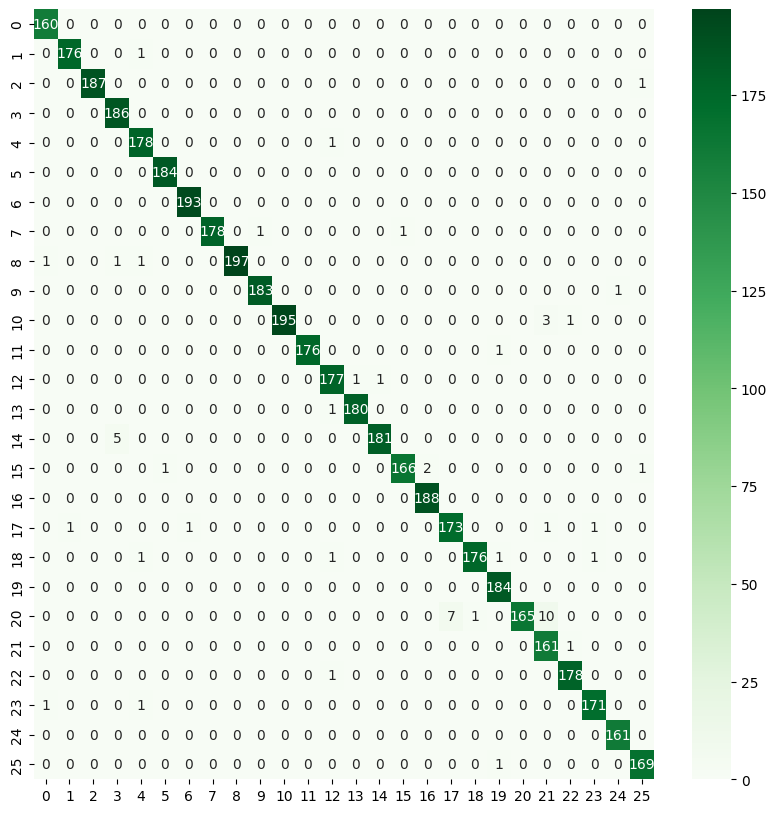

In [25]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# function to make pretty confusion matrix
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')






# create the cunfusion matrix
confussion_matrix(confusion_matrix(test_y,mypred))
